# Linear Regression - part 1

## Seoul Artificial Intelligence Meetup

Martin Kersner, <m.kersner@gmail.com>

2017/10/28

In [1]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Dataset creation

In [2]:
X = np.matrix([[1], [2], [3], [4], [5]])
y = np.matrix([[0], [3], [2], [4.5], [8]])

# If features were not standardized, we have to add ones as a first column to data matrix
X = np.c_[np.ones(X.shape[0]), X]

## Ordinary Least Squares

### Equation
$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

### Assumption
$m$ > $n$

In [3]:
# Inspired by book Machine Learning in Action, Peter Harrington
class OrdinaryLeastSquares(object):
    def __init__(self):
        self.β̂  = None


    def fit(self, X, y):
        XtX = X.T*X

        # matrix must be non-singular
        assert(np.linalg.det(XtX) != 0.0)

        self.β̂  = XtX.I*X.T*y
    
    
    def predict(self, X):
        return X*self.β̂ 

### Train and predict on simple dataset

In [4]:
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ = ols.predict(X)

### Display training data and regression result

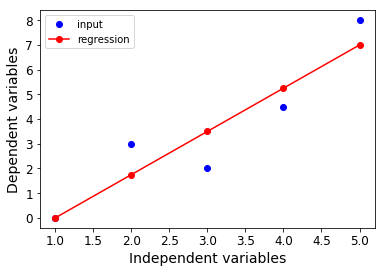

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,1], y, color='b', linestyle="", marker="o", label="input")
ax.plot(X[:,1], ŷ, marker='o', linestyle='-', color='r', label="regression")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

### Evaluation

#### Correlation

${\displaystyle r_{xy}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$

In [6]:
def corrcoef(A, B):
    mean_A = A - np.mean(A)
    mean_B = B - np.mean(B)
    return mean_A.T*mean_B / \
           np.sqrt(np.sum(np.square(mean_A))*np.sum(np.square(mean_B)))

In [7]:
corrcoef(y, ŷ)

matrix([[ 0.92233098]])

**numpy**

[numpy.corrcoef](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html)

In [8]:
np.corrcoef(np.transpose(y),
            np.transpose(ŷ))

array([[ 1.        ,  0.92233098],
       [ 0.92233098,  1.        ]])

#### Coefficient Of Determination (R^2)

${\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}$

$SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}$

${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$

$R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}$

In [9]:
def r2(y, ŷ):
    SS_tot = np.sum(np.square(y - np.mean(y)))
    SS_res = np.sum(np.square(y - ŷ))
    
    return 1.0 - SS_res/SS_tot

In [10]:
r2(y, ŷ)

0.85069444444444442

**scikit-learn**

[sklearn.metrics.r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [11]:
from sklearn.metrics import r2_score

r2_score(y, ŷ)

0.85069444444444442

## Boston dataset

Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [12]:
from sklearn.datasets import load_boston

boston = load_boston()

In [13]:
boston.data.shape

(506, 13)

In [14]:
boston.target.shape

(506,)

In [15]:
X_boston = boston.data
y_boston = boston.target

# data preprocessing
X_boston = np.matrix(np.c_[np.ones(X_boston.shape[0]), X_boston])
y_boston = np.matrix(y_boston[:, np.newaxis])

### Practise

1. Train with Ordinary Least Squares
2. Evaluate regression with R^2 and correlation coefficient 